# 1. 환경설정

In [3]:
from matplotlib import pyplot as plt
from datetime import datetime as dt

import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import random
import warnings


warnings.filterwarnings('ignore')
# Pandas 데이터 프레임에서 float을 소수점 2자리 까지 출력해 준다.
pd.set_option('display.float_format', lambda x: '%.4f' % x)
# Pandas 데이터 프레임에서 column을 다 출력하도록 설정한다.
pd.set_option('display.max_columns', None)
# Pandas 데이터 프레임에서 row를 다 출력하도록 설정한다.
#pd.set_option('display.max_rows', None)


random.seed(3)

In [2]:
d1 = pd.read_csv('dataset/2020to2022.csv', encoding = 'cp949')
d2 = pd.read_csv('dataset/2023result.csv', encoding = 'cp949')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/2020to2022.csv'

# 2. 데이터 전처리

### 1) 데이터 병합

In [3]:
data = pd.concat([d1, d2], axis = 0)  # idx = ~22235까지 ~2022 // idx 22236~부터 2023
data = data.reset_index(drop=True)
# 날짜화
data['B_Date'] = pd.to_datetime(data['B_Date'], format = '%Y-%m-%d')

### 2) 데이터 순서 보존

In [4]:
#### 데이터 순서 빠그러지지 않게 해주는 변수
data['Order'] = np.ones((len(data),1))
order = 1
idx = 1
while True:
    try:
        t1 = data['B_Team'][idx]
        t2 = data['B_Team'][idx-1]
        t3 = data['B_Date'][idx]
        t4 = data['B_Date'][idx-1]
        if t1 == t2 and t3==t4:
            data['Order'][idx] = order
        else:
            order += 1
            data['Order'][idx] = order
        idx += 1
    except:
        print('끝')
        break

끝


### 3) 사전 논의 컬럼 제거

In [5]:
'''
변수 제거사항
## B 계열
'B_Place', 'B_Crowd'
## C 계열(Name은 Groupby 시 구분 용으로만 쓰고 지워야함)
'C_Name', 'C_Backnum', 'C_Pos', 'C_Time'
## A 계열

## G 계열

'''
data.drop(['B_Place', 'B_Crowd', 'C_Name',
           'C_Backnum', 'C_Pos', 'C_Time'], axis = 1, inplace = True) 
# 선행적 예측에서는 B_HomeWin, B_AwayWin, C_Rate, A_Score, A_Assist, G_Loss 활용

### 4) 백분위 컬럼 분모 복원

In [6]:
PerCol = ['A_DribSucPer', 'P_PassSucPer', 'P_AASucPer', 'P_MASucPer', 'P_DASucPer', 'P_LongSucPer',
         'P_MidSucPer', 'P_ShortSucPer', 'P_ForSucPer', 'P_SidSucPer', 'P_BackSucPer', 'P_CrossSucPer',
         'D_GroundSucPer', 'D_AirSucPer', 'D_TackSucPer', 
         'G_KickSucPer', 'G_AirSucPer']
for col in PerCol:
    data[col[:-6]+'Trial'] = np.ones((len(data), 1))
for col in enumerate(data.columns):
    print(col)
    
PerNum = [22,24,27,29,31,33,35,37,39,41,43,45,48,50,52,67,69]
print(len(PerCol))
print(len(PerNum))

for n in PerNum:
    nlist = list()
    for i in range(len(data)):
        try:
            nlist.append(round((100*data[data.columns[n]].loc[i]/data[data.columns[n+1]].loc[i])))
        except:
            nlist.append(0)
    data[data.columns[n][:-6]+'Trial'] = nlist
data.drop(PerCol, axis = 1, inplace = True)

(0, 'B_Date')
(1, 'B_Ref')
(2, 'B_TeamScore')
(3, 'B_Team')
(4, 'B_OppTeam')
(5, 'B_isHome')
(6, 'B_HomeWin')
(7, 'B_AwayWin')
(8, 'B_Coach')
(9, 'C_Rate')
(10, 'A_Score')
(11, 'A_Assist')
(12, 'A_Shoot')
(13, 'A_VShoot')
(14, 'A_BShoot')
(15, 'A_nonVShoot')
(16, 'A_PAShoot')
(17, 'A_nonPAShoot')
(18, 'A_Off')
(19, 'A_Free')
(20, 'A_Corner')
(21, 'A_Throw')
(22, 'A_DribSucNum')
(23, 'A_DribSucPer')
(24, 'P_PassSucNum')
(25, 'P_PassSucPer')
(26, 'P_Key')
(27, 'P_AASucNum')
(28, 'P_AASucPer')
(29, 'P_MASucNum')
(30, 'P_MASucPer')
(31, 'P_DASucNum')
(32, 'P_DASucPer')
(33, 'P_LongSucNum')
(34, 'P_LongSucPer')
(35, 'P_MidSucNum')
(36, 'P_MidSucPer')
(37, 'P_ShortSucNum')
(38, 'P_ShortSucPer')
(39, 'P_ForSucNum')
(40, 'P_ForSucPer')
(41, 'P_SidSucNum')
(42, 'P_SidSucPer')
(43, 'P_BackSucNum')
(44, 'P_BackSucPer')
(45, 'P_CrossSucNum')
(46, 'P_CrossSucPer')
(47, 'P_PR')
(48, 'D_GroundSucNum')
(49, 'D_GroundSucPer')
(50, 'D_AirSucNum')
(51, 'D_AirSucPer')
(52, 'D_TackSucNum')
(53, 'D_TackSucP


KeyboardInterrupt



### 5) 팀 단위 데이터 생성

In [ ]:
df = data.groupby(['B_Date', 'B_Team', 'B_OppTeam']).agg({
    'B_Ref':'unique', 'B_TeamScore':'unique', 'B_isHome':'unique',
    'B_HomeWin':'unique', 'B_AwayWin':'unique', 'B_Coach':'unique',
    'C_Rate':'mean','A_Score':'sum', 'A_Assist':'sum',
    'A_Shoot':'sum', 'A_VShoot':'sum', 'A_BShoot':'sum', 
    'A_nonVShoot':'sum','A_PAShoot':'sum', 'A_nonPAShoot':'sum', 'A_Off':'sum', 
    'A_Free':'sum', 'A_Corner':'sum', 'A_Throw':'sum','A_DribSucNum':'sum', 'A_DribTrial':'sum',
    'P_PassTrial':'sum', 'P_PassSucNum':'sum', 'P_Key':'sum', 'P_AASucNum':'sum', 'P_AATrial':'sum',
    'P_MASucNum':'sum', 'P_MATrial':'sum', 'P_DASucNum':'sum', 'P_DATrial':'sum' ,
    'P_LongSucNum':'sum', 'P_LongTrial':'sum', 'P_MidSucNum':'sum', 'P_MidTrial':'sum', 
    'P_ShortSucNum':'sum', 'P_ShortTrial':'sum','P_ForSucNum':'sum', 'P_ForTrial':'sum', 
    'P_SidSucNum':'sum', 'P_SidTrial':'sum', 'P_BackSucNum':'sum', 'P_BackTrial':'sum', 
    'P_CrossSucNum':'sum',  'P_CrossTrial':'sum','P_PR':'sum', 
    'D_GroundSucNum':'sum', 'D_GroundTrial':'sum', 'D_AirSucNum':'sum', 'D_AirTrial':'sum', 
    'D_TackSucNum':'sum', 'D_TackTrial':'sum', 'D_Clear':'sum', 'D_Inter':'sum',
    'D_Shut':'sum', 'D_Gain':'sum', 'D_Block':'sum', 
    'D_Miss':'sum', 'D_Foul':'sum', 'D_GainFoul':'sum','D_Yellow':'sum', 'D_Red':'sum', 
    'G_Loss':'sum', 'G_Catch':'sum', 'G_Punch':'sum', 'G_KickSucNum':'sum', 'G_KickTrial':'sum', 
    'G_AirSucNum':'sum', 'G_AirTrial':'sum',
    'Order':'mean'
}).reset_index()

In [109]:
Collist = ['B_Ref', 'B_TeamScore', 'B_isHome', 'B_HomeWin', 'B_AwayWin', 'B_Coach']
for col in Collist:
    for i in range(len(df)):
        df[col].loc[i] = str(df[col].loc[i])[1:-1]
Collist = ['B_Ref', 'B_Coach']
for col in Collist:
    for i in range(len(df)):
        df[col].loc[i] = str(df[col].loc[i])[1:-1]
data = df

### 6) 데이터 순서 조정

In [110]:
data = data.sort_values(by='Order', axis = 0, ascending = True)
data = data.reset_index(drop = True)
#data.drop('Order', axis = 1, inplace = True)
count = 0
idx = list()
for i in range(len(data)):
    ht = data.iloc[i,1]
    at = data.iloc[i,2]
    if ht==at:
        count+=1
        idx.append(i)
print(count)
print(idx)

13
[3, 14, 33, 108, 312, 848, 851, 854, 1156, 1359, 1371, 1562, 1598]


In [111]:
### 13개 데이터가 홈팀과 어웨이 팀이 같음 
### 확인결과 단순 데이터 중복
data.drop(idx, axis = 0, inplace = True)
data = data.reset_index(drop = True)
data.shape

(1620, 72)

In [112]:
for i in range(len(data)):
    data.iloc[i,4] = int(float(data.iloc[i,4]))
    data.iloc[i,5] = int(float(data.iloc[i,5]))
    data.iloc[i,6] = int(float(data.iloc[i,6]))
    data.iloc[i,7] = int(float(data.iloc[i,7]))

In [114]:
data.to_csv('20202023Dividend20231000.csv', header = True, index = False, encoding = 'cp949')

--------------------------------------------------------------------------------------------------------------

# 3. 배당률 데이터 불러오기

In [960]:
data = pd.read_csv('dataset/20202023Dividend20231001.csv', encoding = 'cp949')

In [961]:
data.drop(['A_Score', 'Order'], axis = 1, inplace = True) # B_TeamScore랑 겹침

In [962]:
len(data)==data['Proto'].nunique()

True

In [963]:
#data = data.iloc[:1620,:]

# 4. 팀 데이터 전처리

In [964]:
collist = ['B_TeamScore', 'C_Rate','A_Assist', 'A_Shoot',
           'A_VShoot', 'A_BShoot', 'A_nonVShoot',
           'A_PAShoot', 'A_nonPAShoot', 'A_Off', 'A_Free', 'A_Corner', 'A_Throw',
           'A_DribSucNum', 'A_DribTrial', 'P_PassTrial', 'P_PassSucNum', 'P_Key',
           'P_AASucNum', 'P_AATrial', 'P_MASucNum', 'P_MATrial', 'P_DASucNum',
           'P_DATrial', 'P_LongSucNum', 'P_LongTrial', 'P_MidSucNum', 'P_MidTrial',
           'P_ShortSucNum', 'P_ShortTrial', 'P_ForSucNum', 'P_ForTrial',
           'P_SidSucNum', 'P_SidTrial', 'P_BackSucNum', 'P_BackTrial',
           'P_CrossSucNum', 'P_CrossTrial', 'P_PR', 'D_GroundSucNum',
           'D_GroundTrial', 'D_AirSucNum', 'D_AirTrial', 'D_TackSucNum',
           'D_TackTrial', 'D_Clear', 'D_Inter', 'D_Shut', 'D_Gain', 'D_Block',
           'D_Miss', 'D_Foul', 'D_GainFoul', 'D_Yellow', 'D_Red', 'G_Loss', 'G_Catch',
           'G_Punch', 'G_KickSucNum', 'G_KickTrial', 'G_AirSucNum', 'G_AirTrial']

for col in collist:
    data[col+'_1'] = np.ones((len(data),1)) # 허용 데이터 자리
for i in range(len(data)):
    for col in collist:
        if i%2==0:
            data[col+'_1'][i] = data[col][i+1]
        else:
            data[col+'_1'][i] = data[col][i-1]

In [965]:
# 날짜화
data['B_Date'] = pd.to_datetime(data['B_Date'], format = '%Y-%m-%d')

In [966]:
data = data.sort_values(by='Proto', axis = 0, ascending = True)

### 승무패 결과 데이터 입력
result = list()
for i in range(0, len(data), 2):
    hr = data.iloc[i,9]
    ar = data.iloc[i,10]
    if hr>ar:
        result.append(1)
        result.append(0)
    elif hr<ar:
        result.append(0)
        result.append(1)
    else:
        result.append(0.5)
        result.append(0.5)
        
data['Result'] = result
data['Result'] = data['Result'].astype('float64')

In [967]:
data.drop(['B_HomeWin', 'B_AwayWin'], axis = 1, inplace = True)

In [968]:
df0 = data[data['B_Date']<'2021-01-01'] 
df1 = data[data['B_Date']>='2021-01-01'] 
df1 = df1[df1['B_Date']<'2022-01-01'] 
df2 = data[data['B_Date']>='2022-01-01'] 
df2 = df2[df2['B_Date']<'2023-01-01'] 
df3 = data[data['B_Date']>='2023-01-01'] 

# 5. ELO 도입

In [969]:
df0['ELO'] = 1500
df0['ELO_2'] = 1500
df1['ELO'] = 1500
df1['ELO_2'] = 1500
df2['ELO'] = 1500
df2['ELO_2'] = 1500
df3['ELO'] = 1500
df3['ELO_2'] = 1500

In [970]:
def ELO(rating1, rating2, diff, result):
    # 홈/어웨이 기대 퍼포먼스
    EH = 1/(1+10**((rating2-rating1)/400))
    EA = 1-EH
    
    # 가중치
    k = 10*(1+diff) # 골득실 반영 
    
    # 결과 변수 #1:승/0.5:무/0:패
    SH = result
    SA = 1-SH
    
    # 레이팅 갱신
    RH_1 = rating1 + k*(SH-EH)
    RA_1 = rating2 + k*(SA-EA)
    
    return round(RH_1), round(RA_1)

In [971]:
def CalcELOAff(rating1, rating2):
    # 홈/어웨이 기대 퍼포먼스
    EH = 1/(1+10**((rating2-rating1)/400))
    EA = 1-EH
    
    PH = 0.448 + (0.0053*(EH-EA))
    PA = 0.245 + (0.0039*(EA-EH))
    PD = 1 - (PH+PA)
    Pstd = np.std([rating1, rating2])
    
    return PH, PD, Pstd

In [972]:
df0 = df0.sort_values(by='Proto', axis = 0, ascending = True)
df1 = df1.sort_values(by='Proto', axis = 0, ascending = True)
df2 = df2.sort_values(by='Proto', axis = 0, ascending = True)
df3 = df3.sort_values(by='Proto', axis = 0, ascending = True)

df0 = df0.reset_index(drop=True)
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True)

#### 2020년 ELO 도입
for i in range(0,len(df0),2):
    result = df0.Result[i]  # i행 결과
    elo = df0.ELO[i] # i행 팀 ELO
    result_2 = df0.Result[i+1] # i+1행 결과
    elo_2 = df0.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df0.B_TeamScore[i]-df0.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df0.loc[df0.B_Team == df0.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df0.iloc[i,-1] = elo_new
        df0.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df0.loc[ df0.B_Team == df0.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df0.iloc[i+1,-1] = elo_new_2
        df0.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df0)-12,len(df0), 2):
        result = df0.Result[i]  # i행 결과
        elo = df0.ELO[i] # i행 팀 ELO
        result_2 = df0.Result[i+1] # i+1행 결과
        elo_2 = df0.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df0.B_TeamScore[i]-df0.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df0.iloc[i,-1] = elo_new
        df0.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df0),2):
    rating1 = df0.iloc[i,-2]
    rating2 = df0.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df0['ELO_WinRate'] = ELO_WinRate
df0['ELO_DrawRate'] = ELO_DrawRate
df0['ELO_STD'] = ELO_STD

### 시즌 첫 라운드에 잔류 팀은 전 시즌 elo_2 그대로 가져오고
### 승격 팀은 1500에서 시작
### 2021시즌 ELO지수
df1.iloc[0,-2] = df0.iloc[320,-4]
df1.iloc[1,-2] = df0.iloc[312,-4]
df1.iloc[2,-2] = df0.iloc[321,-4]
df1.iloc[4,-2] = df0.iloc[322,-4]
df1.iloc[5,-2] = df0.iloc[313,-4]
df1.iloc[6,-2] = df0.iloc[315,-4]
df1.iloc[7,-2] = df0.iloc[319,-4]
df1.iloc[8,-2] = df0.iloc[318,-4]
df1.iloc[9,-2] = df0.iloc[314,-4]
df1.iloc[10,-2] = df0.iloc[316,-4]

for i in range(0,len(df1),2):
    result = df1.Result[i]  # i행 결과
    elo = df1.ELO[i] # i행 팀 ELO
    result_2 = df1.Result[i+1] # i+1행 결과
    elo_2 = df1.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df1.B_TeamScore[i]-df1.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df1.loc[df1.B_Team == df1.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df1.iloc[i,-1] = elo_new
        df1.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df1.loc[ df1.B_Team == df1.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df1.iloc[i+1,-1] = elo_new_2
        df1.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df1)-12,len(df1), 2):
        result = df1.Result[i]  # i행 결과
        elo = df1.ELO[i] # i행 팀 ELO
        result_2 = df1.Result[i+1] # i+1행 결과
        elo_2 = df1.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df1.B_TeamScore[i]-df1.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df1.iloc[i,-1] = elo_new
        df1.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df1),2):
    rating1 = df1.iloc[i,-2]
    rating2 = df1.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df1['ELO_WinRate'] = ELO_WinRate
df1['ELO_DrawRate'] = ELO_DrawRate
df1['ELO_STD'] = ELO_STD

### 2022시즌 ELO지수
df2.iloc[0,-2] = df1.iloc[450,-4]
df2.iloc[1,-2] = df1.iloc[454,-4]
df2.iloc[2,-2] = df1.iloc[453,-4]
df2.iloc[3,-2] = df1.iloc[445,-4]
df2.iloc[4,-2] = df1.iloc[449,-4]
df2.iloc[5,-2] = df1.iloc[455,-4]
df2.iloc[6,-2] = df1.iloc[451,-4]
df2.iloc[7,-2] = df1.iloc[444,-4]
df2.iloc[8,-2] = df1.iloc[446,-4]
df2.iloc[9,-2] = df1.iloc[447,-4]
df2.iloc[10,-2] = df1.iloc[452,-4]
df2.iloc[11,-2] = 1515

for i in range(0,len(df2),2):
    result = df2.Result[i]  # i행 결과
    elo = df2.ELO[i] # i행 팀 ELO
    result_2 = df2.Result[i+1] # i+1행 결과
    elo_2 = df2.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df2.B_TeamScore[i]-df2.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df2.loc[df2.B_Team == df2.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df2.iloc[i,-1] = elo_new
        df2.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df2.loc[ df2.B_Team == df2.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df2.iloc[i+1,-1] = elo_new_2
        df2.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df2)-12,len(df2), 2):
        result = df2.Result[i]  # i행 결과
        elo = df2.ELO[i] # i행 팀 ELO
        result_2 = df2.Result[i+1] # i+1행 결과
        elo_2 = df2.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df2.B_TeamScore[i]-df2.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df2.iloc[i,-1] = elo_new
        df2.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df2),2):
    rating1 = df2.iloc[i,-2]
    rating2 = df2.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df2['ELO_WinRate'] = ELO_WinRate
df2['ELO_DrawRate'] = ELO_DrawRate
df2['ELO_STD'] = ELO_STD


### 2023시즌 ELO지수
df3.iloc[0,-2] = df2.iloc[450,-4]
df3.iloc[1,-2] = df2.iloc[452,-4]
df3.iloc[2,-2] = df2.iloc[445,-4]
df3.iloc[3,-2] = df2.iloc[453,-4]
df3.iloc[4,-2] = df2.iloc[447,-4]
df3.iloc[5,-2] = 1409
df3.iloc[6,-2] = df2.iloc[454,-4]
df3.iloc[7,-2] = df2.iloc[449,-4]
df3.iloc[8,-2] = df2.iloc[451,-4]
df3.iloc[9,-2] = df2.iloc[444,-4]
df3.iloc[10,-2] = 1500
df3.iloc[11,-2] = df2.iloc[455,-4]

for i in range(0,len(df3),2):
    result = df3.Result[i]  # i행 결과
    elo = df3.ELO[i] # i행 팀 ELO
    result_2 = df3.Result[i+1] # i+1행 결과
    elo_2 = df3.ELO[i+1] # i+1행 팀 ELO
    diff = abs(df3.B_TeamScore[i]-df3.B_TeamScore[i+1])
    
    elo_new, elo_new_2 = ELO(elo, elo_2, diff, result) # <<< 홈 팀의 승부에 따른 승점

    
    try:
        #A팀 다음경기 엘로레이팅 삽입
        adf = df3.loc[df3.B_Team == df3.B_Team[i],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df3.iloc[i,-1] = elo_new
        df3.iloc[next_index,-2] = elo_new
        

        #B팀 다음경기 엘로레이팅 삽입
        adf = df3.loc[ df3.B_Team == df3.B_Team[i+1],]
        adf = adf.reset_index()
        cindex = adf.loc[adf['index']==i+1].index.values[0]
        next_index = adf.loc[[cindex+1]]['index'].values[0]
        df3.iloc[i+1,-1] = elo_new_2
        df3.iloc[next_index,-2] = elo_new_2
    
    except:
        continue
    
    for i in range(len(df3)-12,len(df3), 2):
        result = df3.Result[i]  # i행 결과
        elo = df3.ELO[i] # i행 팀 ELO
        result_2 = df3.Result[i+1] # i+1행 결과
        elo_2 = df3.ELO[i+1] # i+1행 팀 ELO
        diff = abs(df3.B_TeamScore[i]-df3.B_TeamScore[i+1])
        elo_new, elo_new_2 = ELO(elo, elo_2, diff, result)
        
        df3.iloc[i,-1] = elo_new
        df3.iloc[i+1,-1] = elo_new_2
        
### 승률/무승부확률/표준편차
ELO_WinRate = list()
ELO_DrawRate = list()
ELO_STD = list()

for i in range(0,len(df3),2):
    rating1 = df3.iloc[i,-2]
    rating2 = df3.iloc[i+1,-2]
    elo_winrate, elo_drawrate, elo_std = CalcELOAff(rating1 = rating1, rating2 = rating2)
    hwin = round(elo_winrate,4)
    awin = round(1-(elo_winrate+elo_drawrate), 4)
    ELO_WinRate.append(hwin)
    ELO_WinRate.append(awin)
    ELO_DrawRate.append(elo_drawrate)
    ELO_DrawRate.append(elo_drawrate)
    ELO_STD.append(elo_std)
    ELO_STD.append(elo_std)

df3['ELO_WinRate'] = ELO_WinRate
df3['ELO_DrawRate'] = ELO_DrawRate
df3['ELO_STD'] = ELO_STD

df0.drop('ELO_2', axis = 1, inplace = True)
df1.drop('ELO_2', axis = 1, inplace = True)
df2.drop('ELO_2', axis = 1, inplace = True)
df3.drop('ELO_2', axis = 1, inplace = True)

# 5'. Streak Index 도입

In [973]:
s = 5 # -1이 참고 개수

In [974]:
df0['Streak'] = 0
df0['WStreak'] = 0

df1['Streak'] = 0
df1['WStreak'] = 0

df2['Streak'] = 0
df2['WStreak'] = 0

df3['Streak'] = 0
df3['WStreak'] = 0

In [975]:
df0 = df0.sort_values(['B_Team', 'B_Date'])
df1 = df1.sort_values(['B_Team', 'B_Date'])
df2 = df2.sort_values(['B_Team', 'B_Date'])
df3 = df3.sort_values(['B_Team', 'B_Date'])

df0 = df0.reset_index(drop=True)
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)
df3 = df3.reset_index(drop=True)

In [976]:
def CalcStreak(rlist):
    streak = 0
    rlist = [3 if index == 1 else index for index in results]
    rlist = [1 if index == 0.5 else index for index in rlist]
    streak = sum(rlist)/(3*len(rlist))
    return streak

In [977]:
def CalcWStreak(rlist,s):
    wstreak = 0
    rlist = [3 if index == 1 else index for index in results]
    rlist = [1 if index == 0.5 else index for index in rlist]
    
    for o in range(len(rlist)-1,-1,-1):
        k = len(rlist)
        j = s-1
        p = j-k+o
        
        wstreak += 2*((o+1)*rlist[o])/(3*k*(k-1))
        
    return wstreak

In [978]:
############################################# 2020시즌 #############################################
cnt = 1
df = df0

for i in range(len(df)):
    
    results = []
    
    if (i<s-2):
            df['Streak'].loc[i] = np.nan
            df['WStreak'].loc[i] = np.nan
            continue
    teamBelow = df['B_Team'].loc[i-1]
    teamThis = df['B_Team'].loc[i]
    if teamBelow != teamThis:
        cnt = s-1
    if cnt>0:
        df['Streak'].loc[i] = np.nan
        df['WStreak'].loc[i] = np.nan
        cnt -= 1
        continue
    
    for j in range(1,s):
        results.append(df['Result'].loc[i-j])
    
    df['Streak'].loc[i] = CalcStreak(results)
    df['WStreak'].loc[i] = CalcWStreak(results, s)

############################################# 2021시즌 #############################################
cnt = 1
df = df1

for i in range(len(df)):
    
    results = []
    
    if (i<s-2):
            df['Streak'].loc[i] = np.nan
            df['WStreak'].loc[i] = np.nan
            continue
    teamBelow = df['B_Team'].loc[i-1]
    teamThis = df['B_Team'].loc[i]
    if teamBelow != teamThis:
        cnt = s-1
    if cnt>0:
        df['Streak'].loc[i] = np.nan
        df['WStreak'].loc[i] = np.nan
        cnt -= 1
        continue
    
    for j in range(1,s):
        results.append(df['Result'].loc[i-j])
    
    df['Streak'].loc[i] = CalcStreak(results)
    df['WStreak'].loc[i] = CalcWStreak(results, s)

############################################# 2022시즌 #############################################
cnt = 1
df = df2

for i in range(len(df)):
    
    results = []
    
    if (i<s-2):
            df['Streak'].loc[i] = np.nan
            df['WStreak'].loc[i] = np.nan
            continue
    teamBelow = df['B_Team'].loc[i-1]
    teamThis = df['B_Team'].loc[i]
    if teamBelow != teamThis:
        cnt = s-1
    if cnt>0:
        df['Streak'].loc[i] = np.nan
        df['WStreak'].loc[i] = np.nan
        cnt -= 1
        continue
    
    for j in range(1,s):
        results.append(df['Result'].loc[i-j])
    
    df['Streak'].loc[i] = CalcStreak(results)
    df['WStreak'].loc[i] = CalcWStreak(results, s)

############################################# 2023시즌 #############################################
cnt = 1
df = df3

for i in range(len(df)):
    
    results = []
    
    if (i<s-2):
            df['Streak'].loc[i] = np.nan
            df['WStreak'].loc[i] = np.nan
            continue
    teamBelow = df['B_Team'].loc[i-1]
    teamThis = df['B_Team'].loc[i]
    if teamBelow != teamThis:
        cnt = s-1
    if cnt>0:
        df['Streak'].loc[i] = np.nan
        df['WStreak'].loc[i] = np.nan
        cnt -= 1
        continue
    
    for j in range(1,s):
        results.append(df['Result'].loc[i-j])
    
    df['Streak'].loc[i] = CalcStreak(results)
    df['WStreak'].loc[i] = CalcWStreak(results, s)

### 비평균 데이터 작성

In [979]:
df0 = df0.sort_values(['B_Team', 'B_Date'])
df1 = df1.sort_values(['B_Team', 'B_Date'])
df2 = df2.sort_values(['B_Team', 'B_Date'])
df3 = df3.sort_values(['B_Team', 'B_Date'])

### 건들면 안되는 종속변수
tdf0 = df0.copy()
tdf1 = df1.copy()
tdf2 = df2.copy()
tdf3 = df3.copy()

collist = list()
for col in tdf1.columns:
    collist.append(str(col))
collist.remove('B_Date')
collist.remove('B_Team')
collist.remove('B_OppTeam')
collist.remove('B_Ref')
collist.remove('B_isHome')
collist.remove('B_Coach')
collist.remove('Result')
collist.remove('ELO')
collist.remove('ELO_WinRate')
collist.remove('ELO_DrawRate')
collist.remove('ELO_STD')
collist.remove('Proto')
collist.remove('WinDiv')
collist.remove('DrawDiv')
collist.remove('Streak')
collist.remove('WStreak')

Groupdata0 = pd.DataFrame()
Groupdata0['B_Date'] = tdf0['B_Date']
Groupdata0['B_Team'] = tdf0['B_Team']
Groupdata0['B_OppTeam'] = tdf0['B_OppTeam']
Groupdata0['B_Ref'] = tdf0['B_Ref']
Groupdata0['B_isHome'] = tdf0['B_isHome']
Groupdata0['B_Coach'] = tdf0['B_Coach']
Groupdata0['ELO'] = tdf0['ELO']
Groupdata0['ELO_WinRate'] = tdf0['ELO_WinRate']
Groupdata0['ELO_DrawRate'] = tdf0['ELO_DrawRate']
Groupdata0['ELO_STD'] = tdf0['ELO_STD']
Groupdata0['Proto'] = tdf0['Proto']
Groupdata0['WinDiv'] = tdf0['WinDiv']
Groupdata0['DrawDiv'] = tdf0['DrawDiv']
Groupdata0['Streak'] = tdf0['Streak']
Groupdata0['WStreak'] = tdf0['WStreak']

Groupdata1 = pd.DataFrame()
Groupdata1['B_Date'] = tdf1['B_Date']
Groupdata1['B_Team'] = tdf1['B_Team']
Groupdata1['B_OppTeam'] = tdf1['B_OppTeam']
Groupdata1['B_Ref'] = tdf1['B_Ref']
Groupdata1['B_isHome'] = tdf1['B_isHome']
Groupdata1['B_Coach'] = tdf1['B_Coach']
Groupdata1['ELO'] = tdf1['ELO']
Groupdata1['ELO_WinRate'] = tdf1['ELO_WinRate']
Groupdata1['ELO_DrawRate'] = tdf1['ELO_DrawRate']
Groupdata1['ELO_STD'] = tdf1['ELO_STD']
Groupdata1['Proto'] = tdf1['Proto']
Groupdata1['WinDiv'] = tdf1['WinDiv']
Groupdata1['DrawDiv'] = tdf1['DrawDiv']
Groupdata1['Streak'] = tdf1['Streak']
Groupdata1['WStreak'] = tdf1['WStreak']

Groupdata2 = pd.DataFrame()
Groupdata2['B_Date'] = tdf2['B_Date']
Groupdata2['B_Team'] = tdf2['B_Team']
Groupdata2['B_OppTeam'] = tdf2['B_OppTeam']
Groupdata2['B_Ref'] = tdf2['B_Ref']
Groupdata2['B_isHome'] = tdf2['B_isHome']
Groupdata2['B_Coach'] = tdf2['B_Coach']
Groupdata2['ELO'] = tdf2['ELO']
Groupdata2['ELO_WinRate'] = tdf2['ELO_WinRate']
Groupdata2['ELO_DrawRate'] = tdf2['ELO_DrawRate']
Groupdata2['ELO_STD'] = tdf2['ELO_STD']
Groupdata2['Proto'] = tdf2['Proto']
Groupdata2['WinDiv'] = tdf2['WinDiv']
Groupdata2['DrawDiv'] = tdf2['DrawDiv']
Groupdata2['Streak'] = tdf2['Streak']
Groupdata2['WStreak'] = tdf2['WStreak']

Groupdata3 = pd.DataFrame()
Groupdata3['B_Date'] = tdf3['B_Date']
Groupdata3['B_Team'] = tdf3['B_Team']
Groupdata3['B_OppTeam'] = tdf3['B_OppTeam']
Groupdata3['B_Ref'] = tdf3['B_Ref']
Groupdata3['B_isHome'] = tdf3['B_isHome']
Groupdata3['B_Coach'] = tdf3['B_Coach']
Groupdata3['ELO'] = tdf3['ELO']
Groupdata3['ELO_WinRate'] = tdf3['ELO_WinRate']
Groupdata3['ELO_DrawRate'] = tdf3['ELO_DrawRate']
Groupdata3['ELO_STD'] = tdf3['ELO_STD']
Groupdata3['Proto'] = tdf3['Proto']
Groupdata3['WinDiv'] = tdf3['WinDiv']
Groupdata3['DrawDiv'] = tdf3['DrawDiv']
Groupdata3['Streak'] = tdf3['Streak']
Groupdata3['WStreak'] = tdf3['WStreak']

In [980]:
df0 = df0.sort_values(['B_Team', 'B_Date'])
df1 = df1.sort_values(['B_Team', 'B_Date'])
df2 = df2.sort_values(['B_Team', 'B_Date'])
df3 = df3.sort_values(['B_Team', 'B_Date'])

# 6. k경기 평균 도입

In [981]:
window = 7

############################ k 경기 평균 ###############################
for col in collist:
    Groupdata0[col] = tdf0.groupby('B_Team')[col].shift(1).rolling(window).mean()
for col in collist:
    Groupdata1[col] = tdf1.groupby('B_Team')[col].shift(1).rolling(window).mean()
for col in collist:
    Groupdata2[col] = tdf2.groupby('B_Team')[col].shift(1).rolling(window).mean()
for col in collist:
    Groupdata3[col] = tdf3.groupby('B_Team')[col].shift(1).rolling(window).mean()

# 7. 상대편 데이터 붙이기

In [982]:
collist.append('ELO')
collist.append('ELO_WinRate')
collist.append('WinDiv')
collist.append('Streak')
collist.append('WStreak')

In [983]:
############################ 상대편 데이터 붙여넣기
for col in collist:
    Groupdata0[col+'_Away'] = np.ones((Groupdata0.shape[0]))
    Groupdata1[col+'_Away'] = np.ones((Groupdata1.shape[0]))
    Groupdata2[col+'_Away'] = np.ones((Groupdata2.shape[0]))
    Groupdata3[col+'_Away'] = np.ones((Groupdata3.shape[0]))

Groupdata0 = Groupdata0.reset_index(drop=True)
Groupdata1 = Groupdata1.reset_index(drop=True)
Groupdata2 = Groupdata2.reset_index(drop=True)
Groupdata3 = Groupdata3.reset_index(drop=True)

for i in range(len(Groupdata0)):
    date = Groupdata0.iloc[i,0]
    hteam = Groupdata0.iloc[i,1]
    ateam = Groupdata0.iloc[i,2]
    for col in collist:
        dd = Groupdata0[Groupdata0['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata0[col+'_Away'][i] = float(dd[col].values)
    
    if i==(int(len(Groupdata0)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata0)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata0)*3/4)):
        print('75% 완료')
    
print('2020년도 완료!')
        
for i in range(len(Groupdata1)):
    date = Groupdata1.iloc[i,0]
    hteam = Groupdata1.iloc[i,1]
    ateam = Groupdata1.iloc[i,2]
    for col in collist:
        dd = Groupdata1[Groupdata1['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata1[col+'_Away'][i] = float(dd[col].values)
        
    if i==(int(len(Groupdata1)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata1)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata1)*3/4)):
        print('75% 완료')
print('2021년도 완료!')
        
for i in range(len(Groupdata2)):
    date = Groupdata2.iloc[i,0]
    hteam = Groupdata2.iloc[i,1]
    ateam = Groupdata2.iloc[i,2]
    for col in collist:
        dd = Groupdata2[Groupdata2['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata2[col+'_Away'][i] = float(dd[col].values)
    
    if i==(int(len(Groupdata2)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata2)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata2)*3/4)):
        print('75% 완료')
        
print('2022년도 완료!')
        
for i in range(len(Groupdata3)):
    date = Groupdata3.iloc[i,0]
    hteam = Groupdata3.iloc[i,1]
    ateam = Groupdata3.iloc[i,2]
    for col in collist:
        dd = Groupdata3[Groupdata3['B_Date']==date]
        dd = dd[dd['B_OppTeam']==hteam]
        
        Groupdata3[col+'_Away'][i] = float(dd[col].values)
    
    if i==(int(len(Groupdata3)/4)):
        print('25% 완료')
    if i==(int(len(Groupdata3)/2)):
        print('50% 완료')
    if i==(int(len(Groupdata3)*3/4)):
        print('75% 완료')
    
print('2023년도 완료!')

25% 완료
50% 완료
75% 완료
2020년도 완료!
25% 완료
50% 완료
75% 완료
2021년도 완료!
25% 완료
50% 완료
75% 완료
2022년도 완료!
25% 완료
50% 완료
75% 완료
2023년도 완료!


In [1005]:
Groupdata0 = Groupdata0.sort_values(by='Proto', axis = 0, ascending = True)
Groupdata1 = Groupdata1.sort_values(by='Proto', axis = 0, ascending = True)
Groupdata2 = Groupdata2.sort_values(by='Proto', axis = 0, ascending = True)
Groupdata3 = Groupdata3.sort_values(by='Proto', axis = 0, ascending = True)

Groupdata0 = Groupdata0.reset_index(drop=True)
Groupdata1 = Groupdata1.reset_index(drop=True)
Groupdata2 = Groupdata2.reset_index(drop=True)
Groupdata3 = Groupdata3.reset_index(drop=True)

# 8. 데이터 통합

In [1006]:
result = df0.sort_values('Proto', axis = 0, ascending = True)['Result'].values.tolist()
result = result + df1.sort_values('Proto', axis = 0, ascending = True)['Result'].values.tolist()
result = result + df2.sort_values('Proto', axis = 0, ascending = True)['Result'].values.tolist()
result = result + df3.sort_values('Proto', axis = 0, ascending = True)['Result'].values.tolist()

In [1007]:
data = pd.concat([Groupdata0, Groupdata1,
                  Groupdata2, Groupdata3], axis = 0)
data['Result'] = result
data.dropna(inplace = True, axis = 0)
data = data.reset_index(drop=True)
data = data.sort_values(by='Proto', axis = 0, ascending = True)


In [1008]:
### 승무패 결과 데이터 입력
## ELO 마쳤으니까 라벨 0/1/2로 
for i in range(len(data)):
    res = data.iloc[i,-1]
    if res>0.5:
        data.iloc[i,-1] = 2
    elif res<0.5:
        data.iloc[i,-1] = 0
    else:
        data.iloc[i,-1] = 1

data['Result'] = data['Result'].astype('int32')

# 9. Feature Selection

In [988]:
FSdata = data.copy()
FSdata.index = FSdata['B_Date']
FSdata.drop('B_Date', axis = 1, inplace = True)
FSdata.drop(['B_Team', 'B_OppTeam', 'B_Ref', 'B_Coach', 'Proto'], axis = 1, inplace = True)

In [989]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = FSdata.copy()
y = X.pop('Result')

scaled_data = scaler.fit_transform(X.select_dtypes(exclude=["object", "category"]))
df_scaled = pd.DataFrame(data=scaled_data, columns=X.select_dtypes(exclude=['object', 'category']).columns)
X = df_scaled.copy()

In [990]:
yearindex = len(FSdata[FSdata.index<'2023-01-01'])
X_train = X.iloc[:yearindex,:] # before 2023 / from 2023
y_train = y[:yearindex]
X_test = X.iloc[yearindex:, :]
y_test = y[yearindex:]

len(X_train)/len(data) # 분할비율은 8:2 정도

0.7572815533980582

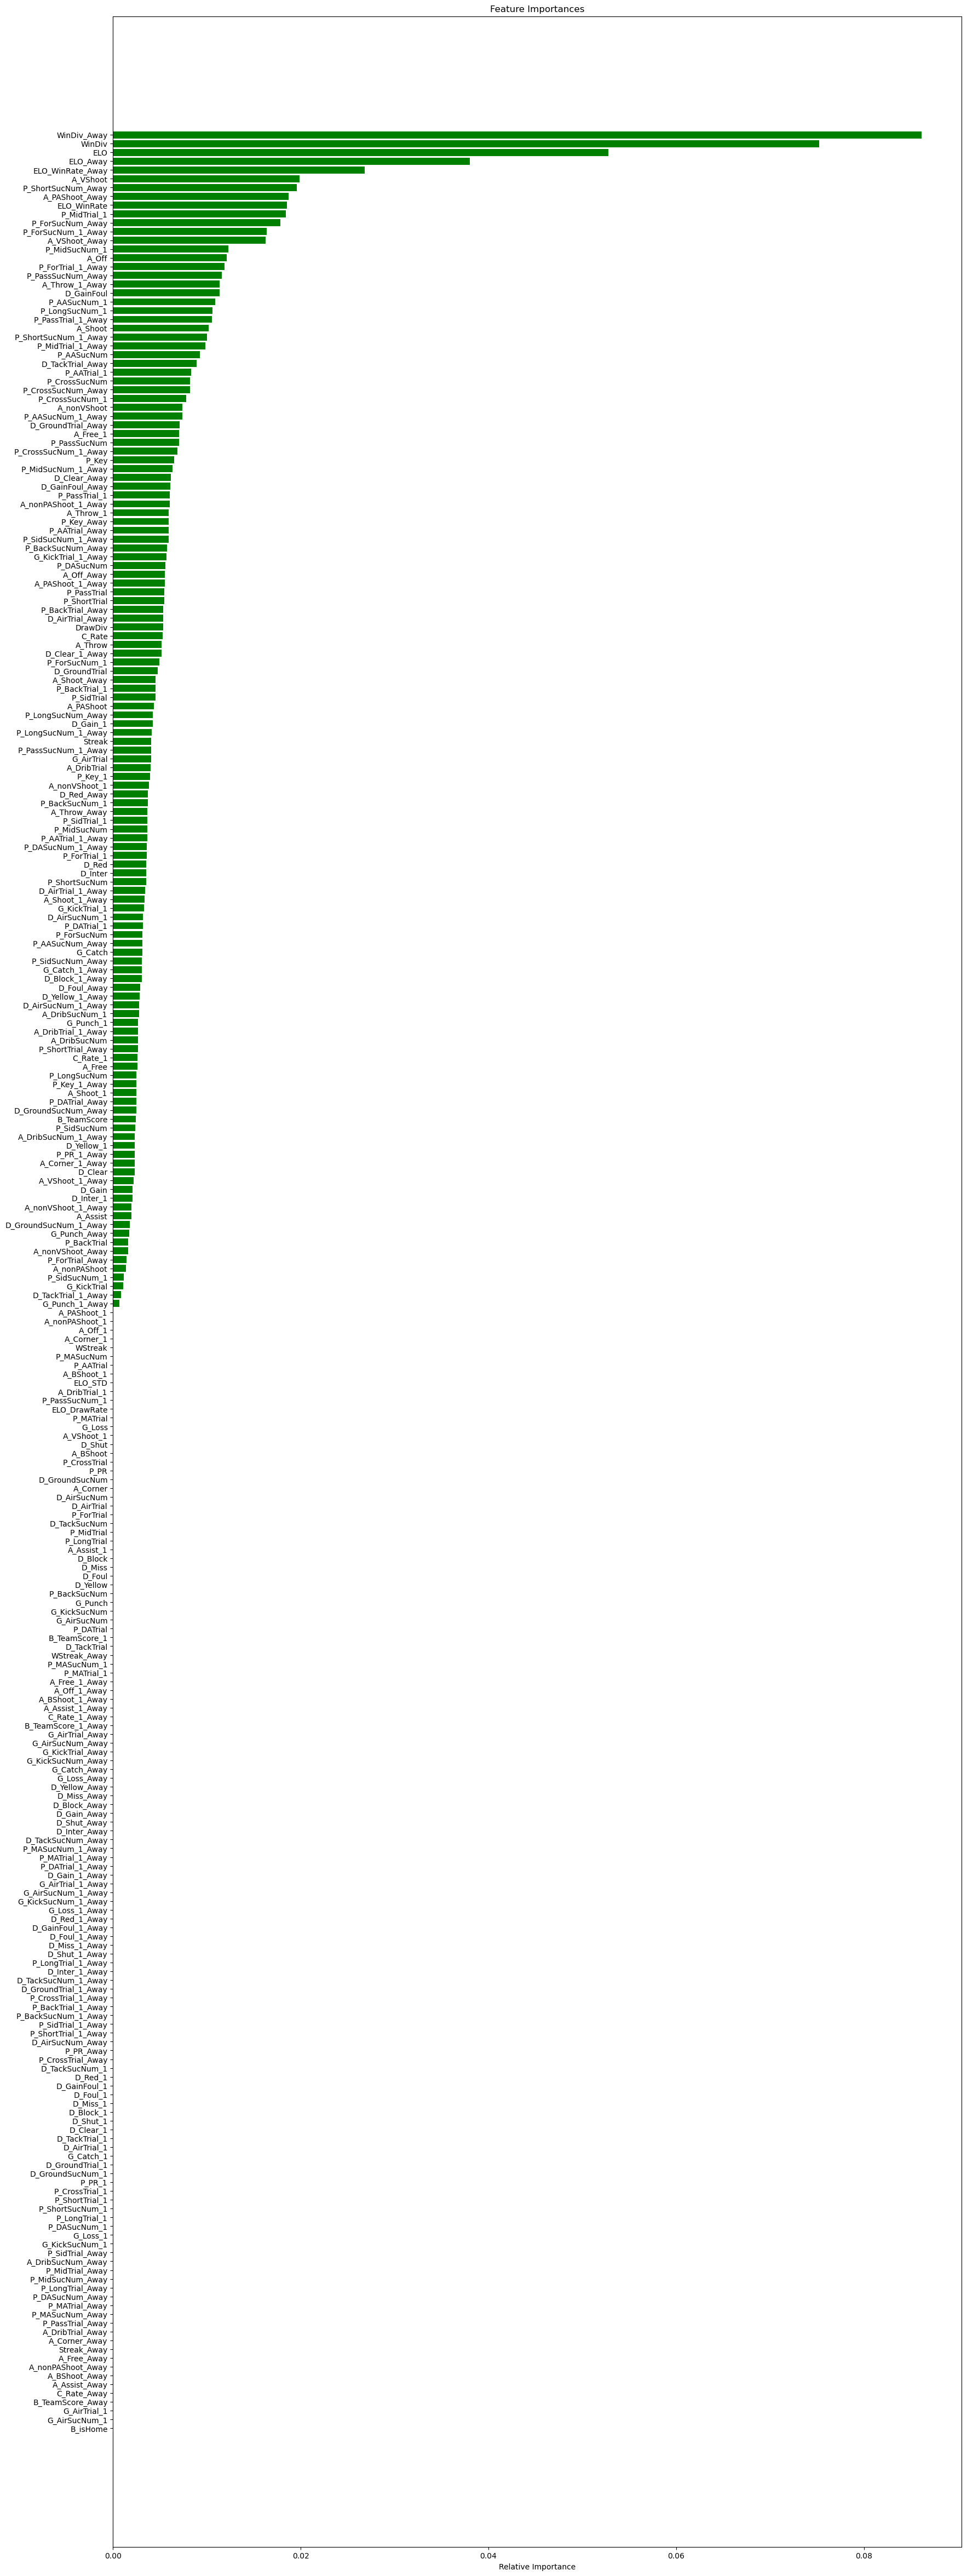

In [991]:
from sklearn.ensemble import RandomForestClassifier

cls = RandomForestClassifier(max_depth=2, random_state=0)
cls.fit(X_train, y_train)

importances = cls.feature_importances_
indices = np.argsort(importances)
features = FSdata.columns
plt.figure(figsize=(20,60))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

----------------------------------------------------------------------------------

In [925]:
feat = features.tolist()
impor = importances.tolist()
feat.pop()

'Result'

In [926]:
featimp = {}
for i in range(len(feat)):
    featimp[feat[i]] = impor[i]

In [927]:
import operator
sorteddict = sorted(featimp.items(), key=operator.itemgetter(1), reverse=True)

In [928]:
sindex = -1
s_index = -1
windex = -1
w_index = -1
    
for i in range(len(feat)):    
    one = sorteddict[i][0]
    if one == 'Streak':
        sindex = i+1
    if one == 'Streak_Away':
        s_index = i+1
    if one == 'WStreak':
        windex = i+1
    if one == 'WStreak_Away':
        w_index = i+1

print('Streak 중요도: ',str(sindex)+'/'+str(len(feat)))
print('상대 Streak 중요도: ',str(s_index)+'/'+str(len(feat)))
print('WStreak 중요도: ',str(windex)+'/'+str(len(feat)))
print('상대 WStreak 중요도: ',str(w_index)+'/'+str(len(feat)))

Streak 중요도:  74/262
상대 Streak 중요도:  262/262
WStreak 중요도:  138/262
상대 WStreak 중요도:  46/262


In [929]:
print('hi')

hi


--------------------------------------------------------------------------------------------

In [133]:
len(features)

260

In [992]:
for i in range(len(features)):
    if features[i] == 'G_Punch_1_Away':
        idxnum = i
        print(i)

252


In [993]:
for i in range(len(importances)):
    if i==idxnum:
        print(importances[i])

0.0006588498429604317


In [994]:
validx = list()
for i in range(len(importances)):
    feat = features.tolist()[:-1]
    impt = importances.tolist()[i]
    if impt >= importances[idxnum]:
        validx.append(i)

In [995]:
selected_features = list()
for i in validx:
    selected_features.append(features[i])

In [996]:
len(selected_features)

134

In [997]:
df = data.iloc[:,:5]
df['Proto'] = data['Proto']
for idx in selected_features:
    df[idx] = data[idx]
df['Result'] = data['Result']
data = df

# 10. 직전 전처리

In [1009]:
proto = data['Proto']
data.drop('Proto', axis = 1, inplace = True)
data = data[data.index%2==0]
# 날짜 인덱스화
data.index = data['B_Date']
data.drop('B_Date', axis = 1, inplace = True)
dv = data['Result']

# 11. 모델링

### 1) Train/Test Split

In [1010]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = data.copy()
y = X.pop('Result')

scaled_data = scaler.fit_transform(X.select_dtypes(exclude=["object", "category"]))
df_scaled = pd.DataFrame(data=scaled_data, columns=X.select_dtypes(exclude=['object', 'category']).columns)
X = df_scaled.copy()

In [1011]:
data.shape

(618, 267)

In [1012]:
yearindex = len(data[data.index<'2023-01-01'])
X_train = X.iloc[:yearindex,:] # before 2023 / from 2023
y_train = y[:yearindex]
X_test = X.iloc[yearindex:, :]
y_test = y[yearindex:]

len(X_train)/len(data) # 분할비율은 8:2 정도

0.7572815533980582

In [1013]:
print(X_train.shape, X_test.shape)

(468, 262) (150, 262)


### 2) ML Fitting

In [145]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier



from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, r2_score

In [1014]:
np.random.seed(42)

# NB
NB = MultinomialNB().fit(X_train, y_train)
y_predicted = NB.predict(X_test)
print(' \n confusion_matrix (Naive Bayesian) \n ')
cm = confusion_matrix(y_test, y_predicted)
print(cm)
print('----------------')
print('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# DT
DT = tree.DecisionTreeClassifier(random_state = 10).fit(X_train, y_train)
y_predicted= DT.predict(X_test)
print (' \n confusion_matrix (Decision Tree) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# SGD
SGD = SGDClassifier(alpha=.0001).fit(X_train, y_train)
y_predicted = SGD.predict(X_test)
print (' \n confusion_matrix (SGD) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# Linear SVC
SVM = LinearSVC().fit(X_train, y_train)
y_predicted = SVM.predict(X_test)
print (' \n confusion_matrix (Linear SVC)\n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# RF
RFA = RandomForestClassifier(n_estimators=10)
RFA.fit(X_train, y_train)
y_predicted = RFA.predict(X_test)
print (' \n confusion_matrix (RandomForest) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# LR
Logi = LogisticRegression(multi_class = 'multinomial')
Logi.fit(X_train, y_train)
y_predicted = Logi.predict(X_test)
print (' \n confusion_matrix (Logistic Regression) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# adaBoost
model_cand = AdaBoostClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (AdaBoost) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# GBM
model_cand = GradientBoostingClassifier(random_state=5)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (GBM) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# LightGBM
model_cand = LGBMClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (LightGBM) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# elasticnet
model_cand = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (ElasticNet) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

# KNN
model_cand = KNeighborsClassifier(n_neighbors = 10)
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (KNN) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

y_train = y_train.astype(int)
y_test = y_test.astype(int)

# XGB
model_cand = XGBClassifier()
model_cand.fit(X_train, y_train)
y_predicted = model_cand.predict(X_test)
print (' \n confusion_matrix (XGB) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

 
 confusion_matrix (Naive Bayesian) 
 
[[12 10 25]
 [12 12 24]
 [10  9 36]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.26      0.30        47
           1       0.39      0.25      0.30        48
           2       0.42      0.65      0.51        55

    accuracy                           0.40       150
   macro avg       0.39      0.39      0.37       150
weighted avg       0.39      0.40      0.38       150

 
 confusion_matrix (Decision Tree) 
 
[[16  9 22]
 [19  8 21]
 [16 11 28]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.34      0.33        47
           1       0.29      0.17      0.21        48
           2       0.39      0.51      0.44        55

    accuracy                           0.35       150
   macro avg       0.33      0.34      0.33       150
weighted avg       0.33      0.35      0.33       150

 

In [1004]:
t = 39+38+37+37+33+41+39+43+45+39+35+46
round(t/12/100, 3)

0.393

# 12. 하이퍼파라미터 조정

In [1017]:
# GBM
gb = GradientBoostingClassifier(random_state=5)
gb.fit(X_train, y_train)
y_predicted = gb.predict(X_test)
print (' \n confusion_matrix (GBM) \n ')
cm = confusion_matrix(y_test, y_predicted)
print (cm)
print('----------------')
print ('\n Classification Report:')
print (classification_report(y_test, y_predicted))
print('=============================================================')

 
 confusion_matrix (GBM) 
 
[[14 19 14]
 [ 7 22 19]
 [10 12 33]]
----------------

 Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.30      0.36        47
           1       0.42      0.46      0.44        48
           2       0.50      0.60      0.55        55

    accuracy                           0.46       150
   macro avg       0.46      0.45      0.45       150
weighted avg       0.46      0.46      0.45       150



In [1018]:
gb_param_grid = {
    'n_estimators' : [100, 200],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [3, 5, 7, 10],
    'min_samples_split' : [2, 3, 5, 10],
    'learning_rate' : [0.05, 0.1, 0.2]
}

In [1020]:
from sklearn.model_selection import GridSearchCV

In [1025]:
gb_grid = GridSearchCV(gb, param_grid = gb_param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 1)
gb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits



KeyboardInterrupt



In [ ]:
print('best parameters : ', gb_grid.best_params_)
print('best score : ', gb_grid.best_score_)

In [ ]:
pred = 